In [1]:
import pandas as pd
import random
import functools
import matplotlib.pyplot as plt
from abtest.utils import epsilon_greedy, thompson_sampling, UCB1

In [35]:
#from scipy.special import beta 
# from scipy.stats import beta 
import scipy
import numpy as np

In [3]:
np.random.beta(10,30)

0.21098958326365938

In [10]:
beta(0,3,3)

0.03333333333333333

In [36]:
scipy.stats.beta.pdf([0,0.1,0.3], 3, 9)

array([0.        , 2.13081269, 2.56821885])

In [26]:
np.linspace(0,1,100)

array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
       0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
       0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
       0.2020202 , 0.21212121, 0.22222222, 0.23232323, 0.24242424,
       0.25252525, 0.26262626, 0.27272727, 0.28282828, 0.29292929,
       0.3030303 , 0.31313131, 0.32323232, 0.33333333, 0.34343434,
       0.35353535, 0.36363636, 0.37373737, 0.38383838, 0.39393939,
       0.4040404 , 0.41414141, 0.42424242, 0.43434343, 0.44444444,
       0.45454545, 0.46464646, 0.47474747, 0.48484848, 0.49494949,
       0.50505051, 0.51515152, 0.52525253, 0.53535354, 0.54545455,
       0.55555556, 0.56565657, 0.57575758, 0.58585859, 0.5959596 ,
       0.60606061, 0.61616162, 0.62626263, 0.63636364, 0.64646465,
       0.65656566, 0.66666667, 0.67676768, 0.68686869, 0.6969697 ,
       0.70707071, 0.71717172, 0.72727273, 0.73737374, 0.74747

In [32]:
betapdf.pdf(np.linspace(0,1,100), 3,3)

array([0.        , 0.00299939, 0.01175395, 0.02590392, 0.045097  ,
       0.06898842, 0.09724088, 0.12952459, 0.16551724, 0.20490404,
       0.24737767, 0.29263832, 0.34039367, 0.3903589 , 0.44225668,
       0.49581718, 0.55077805, 0.60688447, 0.66388908, 0.72155203,
       0.77964096, 0.83793103, 0.89620485, 0.95425256, 1.01187179,
       1.06886765, 1.12505277, 1.18024725, 1.23427871, 1.28698224,
       1.33820044, 1.3877834 , 1.43558872, 1.48148148, 1.52533426,
       1.56702712, 1.60644765, 1.6434909 , 1.67805944, 1.71006332,
       1.73942009, 1.76605481, 1.7899    , 1.81089572, 1.82898948,
       1.84413633, 1.85629878, 1.86544685, 1.87155805, 1.87461741,
       1.87461741, 1.87155805, 1.86544685, 1.85629878, 1.84413633,
       1.82898948, 1.81089572, 1.7899    , 1.76605481, 1.73942009,
       1.71006332, 1.67805944, 1.6434909 , 1.60644765, 1.56702712,
       1.52533426, 1.48148148, 1.43558872, 1.3877834 , 1.33820044,
       1.28698224, 1.23427871, 1.18024725, 1.12505277, 1.06886

In [34]:
np.multiply(betapdf.pdf(np.linspace(0,1,100), 3,3),betapdf.pdf(np.linspace(0,1,100), 3,3))

array([0.00000000e+00, 8.99632747e-06, 1.38155402e-04, 6.71012953e-04,
       2.03373957e-03, 4.75940195e-03, 9.45578847e-03, 1.67766182e-02,
       2.73959566e-02, 4.19856642e-02, 6.11957102e-02, 8.56371848e-02,
       1.15867850e-01, 1.52380069e-01, 1.95590969e-01, 2.45834671e-01,
       3.03356464e-01, 3.68308759e-01, 4.40748709e-01, 5.20637330e-01,
       6.07840034e-01, 7.02128404e-01, 8.03183127e-01, 9.10597945e-01,
       1.02388451e+00, 1.14247805e+00, 1.26574373e+00, 1.39298357e+00,
       1.52344392e+00, 1.65632327e+00, 1.79078041e+00, 1.92594277e+00,
       2.06091498e+00, 2.19478738e+00, 2.32664459e+00, 2.45557400e+00,
       2.58067404e+00, 2.70106233e+00, 2.81588348e+00, 2.92431655e+00,
       3.02558226e+00, 3.11894958e+00, 3.20374202e+00, 3.27934330e+00,
       3.34520253e+00, 3.40083880e+00, 3.44584516e+00, 3.47989195e+00,
       3.50272955e+00, 3.51419042e+00, 3.51419042e+00, 3.50272955e+00,
       3.47989195e+00, 3.44584516e+00, 3.40083880e+00, 3.34520253e+00,
      

In [64]:
scipy.special.beta(3,1)

0.3333333333333333

In [207]:
from scipy.special import betaln
from scipy.special import beta

def h(a,b,c,d):
    # P(X > Y)
    total = 0.0 
    for j in range(c):
        total += np.exp(betaln(a+j, b+d) - np.log(d+j) - betaln(1+j, d) - betaln(a, b))
    return 1 - total
    

In [63]:
h(100,200, 2000,100)

2.3647750424515834e-14

In [55]:
np.log(1)

0.0

In [365]:
def loss(a,b,c,d):
    # Expected loss of picking variant X over Y
    # When Y is better than X
    return (np.exp(betaln(a+1,b)-betaln(a,b))*h(a+1,b,c,d) - \
           np.exp(betaln(c+1,d)-betaln(c,d))*h(a,b,c+1,d))

In [582]:


a,b,c,d = 140,160, 120,200



In [583]:
loss(a,b,c,d)

0.0918051481054446

In [584]:
loss(c,d,a,b)

0.0001384814384414899

In [585]:
h(a,b,c+1,d)

0.9883253735044635

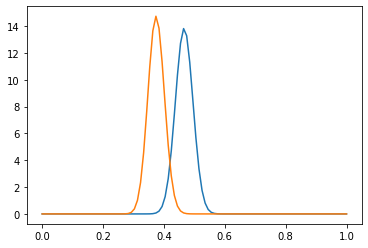

In [586]:
plt.plot(np.linspace(0,1,100), scipy.stats.beta.pdf(np.linspace(0,1,100), a,b))
plt.plot(np.linspace(0,1,100), scipy.stats.beta.pdf(np.linspace(0,1,100), c,d))


In [64]:
var_A ={'code': 'A', 'impressions': 1, 'conversions': 1, 'conversion_rate': 1.0, 'html_template': 'abtest/homepage_A.html'}
var_B ={'code': 'B', 'impressions': 1, 'conversions': 1, 'conversion_rate': 1.0, 'html_template': 'abtest/homepage_B.html'}
var_C ={'code': 'C', 'impressions': 1, 'conversions': 1, 'conversion_rate': 1.0, 'html_template': 'abtest/homepage_C.html'}

In [65]:
variants = [var_A, var_B, var_C]

In [66]:
UCB1(variants)

{'code': 'C',
 'impressions': 1,
 'conversions': 1,
 'conversion_rate': 1.0,
 'html_template': 'abtest/homepage_C.html'}

In [587]:
m = {'sd':2, 'ns':4}

In [589]:
m.get('saa')

In [67]:
num_A = 0
num_B = 0
num_C = 0
for i in range(1000):
    variants = [var_A, var_B, var_C]
    code = epsilon_greedy(variants)['code']
    if code == 'A': 
        num_A+=1
        if random.random() < 0.5:
            var_A['impressions'] +=1
        else:
            var_A['impressions'] +=1
            var_A['conversions'] +=1
        var_A['conversion_rate'] = var_A['conversions']/var_A['impressions']
            
    if code == 'B': 
        num_B+=1
        if random.random() < 0.3:
            var_B['impressions'] +=1
        else:
            var_B['impressions'] +=1
            var_B['conversions'] +=1
        var_B['conversion_rate'] = var_B['conversions']/var_B['impressions']

    if code == 'C': 
        num_C+=1
        if random.random() < 0.5:
            var_C['impressions'] +=1
        else:
            var_C['impressions'] +=1
            var_C['conversions'] +=1
        var_C['conversion_rate'] = var_C['conversions']/var_C['impressions']

In [68]:
var_A

{'code': 'A',
 'impressions': 39,
 'conversions': 15,
 'conversion_rate': 0.38461538461538464,
 'html_template': 'abtest/homepage_A.html'}

In [69]:
var_B

{'code': 'B',
 'impressions': 923,
 'conversions': 643,
 'conversion_rate': 0.6966413867822319,
 'html_template': 'abtest/homepage_B.html'}

In [70]:
var_C

{'code': 'C',
 'impressions': 41,
 'conversions': 23,
 'conversion_rate': 0.5609756097560976,
 'html_template': 'abtest/homepage_C.html'}

In [71]:
print(num_A, num_B, num_C)

38 922 40


In [72]:
def plot_beta(variants):
    x = np.linspace(0,1,200)
    for var in variants:
        y = beta.pdf(x, var['conversions'], var['impressions'] - var['conversions'])
        plt.plot(x, y)

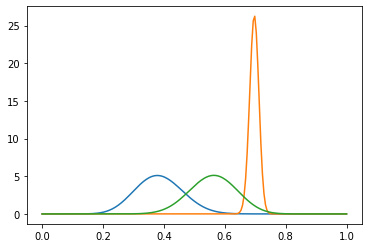

In [73]:
plot_beta([var_A, var_B, var_C])

In [14]:
from scipy.special import beta


In [30]:
for i in range(100000): 
    beta(2,3)

In [192]:
random.sample([1,3,0],1)

[3]

In [160]:
import functools

def ab_campaign(func=None, campaign=None):
    template=''
    def _decorator(func):
        @functools.wraps(func)
        def wrapper(*args, **kwargs):
            return func(*args, template=template, **kwargs)
        return wrapper
    return _decorator

In [161]:

@ab_campaign(campaign='12311')
def hello(**kwargs):
    
    return(kwargs)

In [159]:
hello(z='ho')

{'template': '', 'z': 'ho'}